In [1]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

url = 'E:/Meat_Excels/MeatCutPredictions.csv'

df = pd.read_csv(url, encoding='latin-1')

labels=df['Original_Labels_Color'].values

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [4]:
df.head

<bound method NDFrame.head of       Original_Labels_Color  Log_Reg Prediction  DTC Prediction  Weight  \
0                         0                   2               0    5.94   
1                         0                   2               2    6.20   
2                         0                   2               0    6.04   
3                         0                   4               4    6.48   
4                         0                   2               0    6.34   
...                     ...                 ...             ...     ...   
8063                      4                   2               2    5.30   
8064                      4                   4               2    5.08   
8065                      4                   4               4    7.52   
8066                      4                   4               2    7.34   
8067                      4                   4               4    7.24   

      Colour_Predition_1000  Colour_Predition_25  Colour_Predition_50

In [5]:
feature1 = df[["Weight","Colour_Predition_1000","Log_Reg Prediction","DTC Prediction"]]

In [6]:
feature1.dtypes

Weight                   float64
Colour_Predition_1000      int64
Log_Reg Prediction         int64
DTC Prediction             int64
dtype: object

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X=feature1

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [8]:
print(X_train)
print(X_test)

print(y_train)
print(y_test)


      Weight  Colour_Predition_1000  Log_Reg Prediction  DTC Prediction
6258    5.82                      4                   4               4
6116    6.18                      4                   4               0
7657    9.18                      4                   4               4
3043    5.90                      2                   2               2
1435    5.20                      2                   2               2
...      ...                    ...                 ...             ...
4298    0.86                      3                   3               3
2980    6.06                      2                   2               4
5543    6.56                      4                   2               4
5618    5.34                      4                   4               2
2879    6.30                      2                   4               4

[6454 rows x 4 columns]
      Weight  Colour_Predition_1000  Log_Reg Prediction  DTC Prediction
797     6.96                      0    

In [9]:
from sklearn.datasets import make_blobs
from numpy import where
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
#opt = SGD(lr=0.01, momentum=0.9)
#opt=RMSprop()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)
opt=Adam()
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                  
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 1.7911 - accuracy: 0.1480 - val_loss: 1.4974 - val_accuracy: 0.4841
Epoch 2/100
162/162 [==============================] - 0s 726us/step - loss: 1.2160 - accuracy: 0.5204 - val_loss: 0.9418 - val_accuracy: 0.5833
Epoch 3/100
162/162 [==============================] - 0s 698us/step - loss: 0.8883 - accuracy: 0.5813 - val_loss: 0.7928 - val_accuracy: 0.6065
Epoch 4/100
162/162 [==============================] - 0s 727us/step - loss: 0.7983 - accuracy: 0.5904 - val_loss: 0.7333 - val_accuracy: 0.6150
Epoch 5/100
162/162 [==============================] - 0s 703us/step - loss: 0.7441 - accuracy: 0.6132 - val_loss: 0.6871 - val_accuracy: 0.6359
Epoch 6/100
162/162 [==============================] - 0s 780us/step - loss: 0.6942 - accuracy: 0.6388 - val_loss: 0.6371 - val_accuracy: 0.6654
Epoch 7/100
162/162 [==============================] - 0s 764us/step - loss: 0.6400 - accuracy: 0.6558 - val_loss: 0.5828 - val_accu

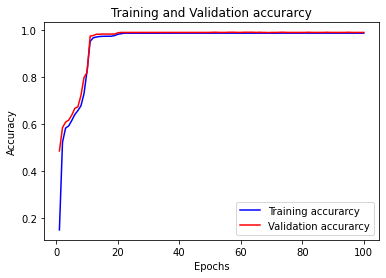

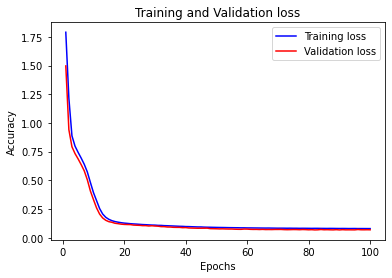

In [10]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
51/51 [==============================] - 0s 587us/step - loss: 0.0634 - accuracy: 0.9895
0.0633559376001358
0.9894671440124512
51/51 [==============================] - 0s 532us/step - loss: 0.0634 - accuracy: 0.9895
Loss Metrics
[0.0633559376001358, 0.9894671440124512]


In [12]:
y_score = model.predict(X_test)

In [13]:
y_score

array([[9.7660124e-01, 8.8724526e-05, 1.8156623e-02, 1.2308674e-07,
        5.1531922e-03, 7.6243857e-08],
       [3.3029491e-07, 1.4116695e-04, 3.4946629e-11, 9.9985778e-01,
        6.5269484e-07, 6.5910349e-08],
       [1.0876332e-03, 2.9362973e-03, 4.7862387e-04, 4.3060540e-05,
        9.9545431e-01, 1.5708569e-10],
       ...,
       [1.5040396e-03, 1.5971141e-03, 1.6134012e-03, 4.6487003e-05,
        9.9523890e-01, 6.6935502e-10],
       [1.8479243e-03, 3.4234903e-03, 1.5930984e-03, 1.6930406e-05,
        9.9311852e-01, 2.6126606e-10],
       [2.4537379e-03, 9.5546190e-03, 1.5457978e-03, 4.9069768e-06,
        9.8644096e-01, 8.1552237e-11]], dtype=float32)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[211   0   5   0   0]
 [  0  14   0   0   1]
 [  2   0 417   0   0]
 [  0   0   0 409   0]
 [  4   0   5   0 546]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       216
           1       1.00      0.93      0.97        15
           2       0.98      1.00      0.99       419
           3       1.00      1.00      1.00       409
           4       1.00      0.98      0.99       555

    accuracy                           0.99      1614
   macro avg       0.99      0.98      0.98      1614
weighted avg       0.99      0.99      0.99      1614



In [15]:
y_pred = model.predict_classes(X_train)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 809    0   32    0    3]
 [   0   74    0    0    9]
 [  20    0 1689    0    4]
 [   1    0    0 1675    0]
 [   4    2   15    0 2117]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       844
           1       0.97      0.89      0.93        83
           2       0.97      0.99      0.98      1713
           3       1.00      1.00      1.00      1676
           4       0.99      0.99      0.99      2138

    accuracy                           0.99      6454
   macro avg       0.98      0.97      0.97      6454
weighted avg       0.99      0.99      0.99      6454



In [17]:
feature1 = df[["Weight","Colour_Predition_150","Log_Reg Prediction","DTC Prediction"]]

In [18]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [19]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 1ms/step - loss: 1.0136 - accuracy: 0.6297 - val_loss: 0.5590 - val_accuracy: 0.8668
Epoch 2/100
162/162 [==============================] - 0s 880us/step - loss: 0.4779 - accuracy: 0.9037 - val_loss: 0.3290 - val_accuracy: 0.9512
Epoch 3/100
162/162 [==============================] - 0s 787us/step - loss: 0.3198 - accuracy: 0.9553 - val_loss: 0.2478 - val_accuracy: 0.9737
Epoch 4/100
162/162 [==============================] - 0s 770us/step - loss: 0.2586 - accuracy: 0.9667 - val_loss: 0.2134 - val_accuracy: 0.9775
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9698 - val_loss: 0.1935 - val_accuracy: 0.9799
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2130 - accuracy: 0.9706 - val_loss: 0.1788 - val_accuracy: 0.9806
Epoch 7/100
162/162 [==============================] - 0s 772us/step - loss: 0.2012 - accuracy: 0.9715 - val_loss: 0.1729 - val_accuracy

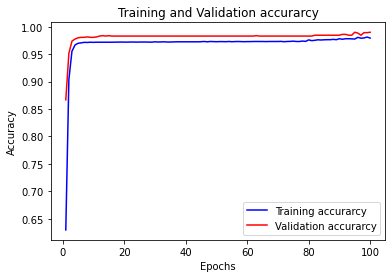

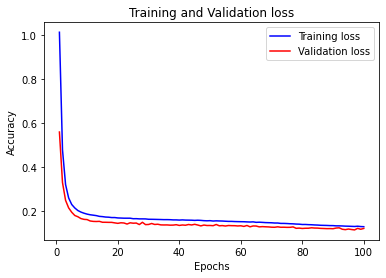

In [20]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 527us/step - loss: 0.1550 - accuracy: 0.9777
0.1549702137708664
0.9776951670646667
51/51 [==============================] - 0s 508us/step - loss: 0.1550 - accuracy: 0.9777
Loss Metrics
[0.1549702137708664, 0.9776951670646667]


In [22]:
y_score = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[210   0   6   0   0]
 [  4   8   0   0   3]
 [ 13   0 405   0   1]
 [  0   0   0 409   0]
 [  5   1   3   0 546]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       216
           1       0.89      0.53      0.67        15
           2       0.98      0.97      0.97       419
           3       1.00      1.00      1.00       409
           4       0.99      0.98      0.99       555

    accuracy                           0.98      1614
   macro avg       0.95      0.89      0.91      1614
weighted avg       0.98      0.98      0.98      1614



In [24]:
y_pred = model.predict_classes(X_train)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 819    0   21    0    4]
 [   8   51   12    0   12]
 [  23    0 1688    0    2]
 [   0    0    1 1675    0]
 [  11    3   13    0 2111]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       844
           1       0.94      0.61      0.74        83
           2       0.97      0.99      0.98      1713
           3       1.00      1.00      1.00      1676
           4       0.99      0.99      0.99      2138

    accuracy                           0.98      6454
   macro avg       0.97      0.91      0.93      6454
weighted avg       0.98      0.98      0.98      6454



In [26]:
feature1 = df[["Weight","Colour_Predition_100","Log_Reg Prediction","DTC Prediction"]]

In [27]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [28]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 1.0049 - accuracy: 0.5874 - val_loss: 0.6053 - val_accuracy: 0.7041
Epoch 2/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7389 - val_loss: 0.3986 - val_accuracy: 0.8404
Epoch 3/100
162/162 [==============================] - 0s 994us/step - loss: 0.3635 - accuracy: 0.9279 - val_loss: 0.2659 - val_accuracy: 0.9651
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.9682 - val_loss: 0.1986 - val_accuracy: 0.9768
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.9704 - val_loss: 0.1744 - val_accuracy: 0.9768
Epoch 6/100
162/162 [==============================] - 0s 850us/step - loss: 0.1820 - accuracy: 0.9706 - val_loss: 0.1571 - val_accuracy: 0.9775
Epoch 7/100
162/162 [==============================] - 0s 788us/step - loss: 0.1660 - accuracy: 0.9708 - val_loss: 0.1451 - val_accuracy: 

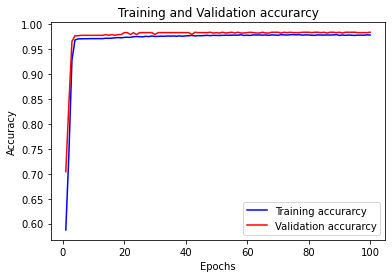

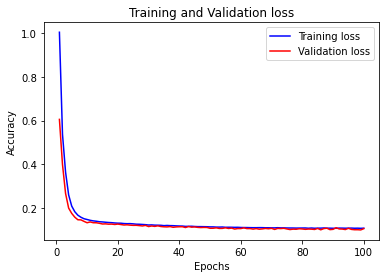

In [29]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 724us/step - loss: 0.1611 - accuracy: 0.9765
0.16105084121227264
0.9764559864997864
51/51 [==============================] - 0s 548us/step - loss: 0.1611 - accuracy: 0.9765
Loss Metrics
[0.16105084121227264, 0.9764559864997864]


In [31]:
y_score = model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[205   1   7   0   3]
 [  0   8   4   0   3]
 [ 10   1 407   0   1]
 [  0   0   0 409   0]
 [  3   1   4   0 547]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       216
           1       0.73      0.53      0.62        15
           2       0.96      0.97      0.97       419
           3       1.00      1.00      1.00       409
           4       0.99      0.99      0.99       555

    accuracy                           0.98      1614
   macro avg       0.92      0.89      0.90      1614
weighted avg       0.98      0.98      0.98      1614



In [33]:
y_pred = model.predict_classes(X_train)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 814    2   26    0    2]
 [   0   56   16    0   11]
 [  43    4 1655    1   10]
 [   0    0    0 1676    0]
 [   1    2    9    0 2126]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       844
           1       0.88      0.67      0.76        83
           2       0.97      0.97      0.97      1713
           3       1.00      1.00      1.00      1676
           4       0.99      0.99      0.99      2138

    accuracy                           0.98      6454
   macro avg       0.96      0.92      0.94      6454
weighted avg       0.98      0.98      0.98      6454



In [35]:
feature1 = df[["Weight","Colour_Predition_50","Log_Reg Prediction","DTC Prediction"]]

In [36]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [37]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                   
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 1ms/step - loss: 1.2033 - accuracy: 0.5789 - val_loss: 1.0538 - val_accuracy: 0.6452
Epoch 2/100
162/162 [==============================] - 0s 794us/step - loss: 1.0222 - accuracy: 0.6384 - val_loss: 0.9396 - val_accuracy: 0.6576
Epoch 3/100
162/162 [==============================] - 0s 732us/step - loss: 0.9317 - accuracy: 0.6587 - val_loss: 0.8654 - val_accuracy: 0.6778
Epoch 4/100
162/162 [==============================] - 0s 764us/step - loss: 0.8712 - accuracy: 0.6752 - val_loss: 0.8146 - val_accuracy: 0.7041
Epoch 5/100
162/162 [==============================] - 0s 751us/step - loss: 0.8265 - accuracy: 0.6903 - val_loss: 0.7739 - val_accuracy: 0.7149
Epoch 6/100
162/162 [==============================] - 0s 806us/step - loss: 0.7913 - accuracy: 0.7044 - val_loss: 0.7409 - val_accuracy: 0.7180
Epoch 7/100
162/162 [==============================] - 0s 751us/step - loss: 0.7626 - accuracy: 0.7114 - val_loss: 0.7149 - val_accu

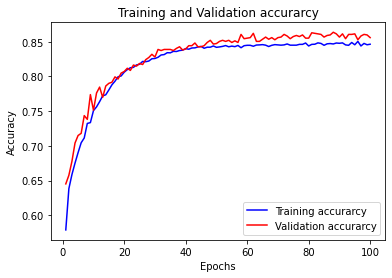

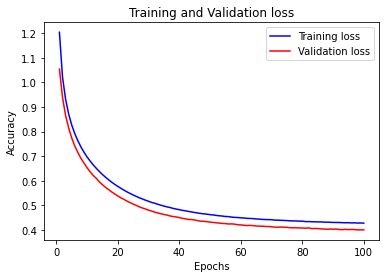

In [38]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 509us/step - loss: 0.4109 - accuracy: 0.8575
0.4108840823173523
0.8574969172477722
51/51 [==============================] - 0s 528us/step - loss: 0.4109 - accuracy: 0.8575
Loss Metrics
[0.4108840823173523, 0.8574969172477722]


In [40]:
y_score = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[ 91   0 109  12   4]
 [  0   0   6   0   9]
 [ 27   0 361   2  29]
 [  2   0   0 407   0]
 [  1   0  29   0 525]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.75      0.42      0.54       216
           1       0.00      0.00      0.00        15
           2       0.71      0.86      0.78       419
           3       0.97      1.00      0.98       409
           4       0.93      0.95      0.94       555

    accuracy                           0.86      1614
   macro avg       0.67      0.64      0.65      1614
weighted avg       0.85      0.86      0.85      1614



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
y_pred = model.predict_classes(X_train)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 353    0  420   58   13]
 [   0    0   24    0   59]
 [ 142    0 1425   16  130]
 [  14    0    0 1662    0]
 [   2    0   99    0 2037]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.69      0.42      0.52       844
           1       0.00      0.00      0.00        83
           2       0.72      0.83      0.77      1713
           3       0.96      0.99      0.97      1676
           4       0.91      0.95      0.93      2138

    accuracy                           0.85      6454
   macro avg       0.66      0.64      0.64      6454
weighted avg       0.83      0.85      0.83      6454



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
feature1 = df[["Weight","Colour_Predition_25","Log_Reg Prediction","DTC Prediction"]]

In [45]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [46]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                  
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 0.9190 - accuracy: 0.6657 - val_loss: 0.5739 - val_accuracy: 0.8218
Epoch 2/100
162/162 [==============================] - 0s 729us/step - loss: 0.5356 - accuracy: 0.8499 - val_loss: 0.4149 - val_accuracy: 0.9055
Epoch 3/100
162/162 [==============================] - 0s 690us/step - loss: 0.4199 - accuracy: 0.9107 - val_loss: 0.3325 - val_accuracy: 0.9404
Epoch 4/100
162/162 [==============================] - 0s 701us/step - loss: 0.3583 - accuracy: 0.9386 - val_loss: 0.2908 - val_accuracy: 0.9520
Epoch 5/100
162/162 [==============================] - 0s 856us/step - loss: 0.3200 - accuracy: 0.9458 - val_loss: 0.2595 - val_accuracy: 0.9551
Epoch 6/100
162/162 [==============================] - 0s 775us/step - loss: 0.2955 - accuracy: 0.9469 - val_loss: 0.2385 - val_accuracy: 0.9551
Epoch 7/100
162/162 [==============================] - 0s 713us/step - loss: 0.2777 - accuracy: 0.9473 - val_loss: 0.2258 - val_accu

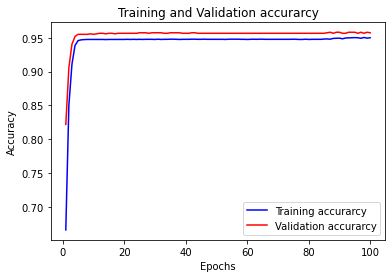

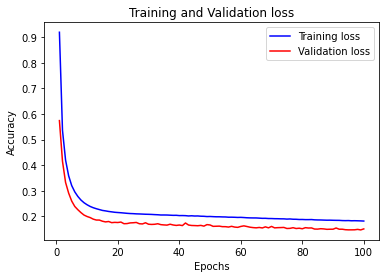

In [47]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 489us/step - loss: 0.1865 - accuracy: 0.9473
0.18652258813381195
0.9473358392715454
51/51 [==============================] - 0s 469us/step - loss: 0.1865 - accuracy: 0.9473
Loss Metrics
[0.18652258813381195, 0.9473358392715454]


In [49]:
y_score = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[198   0  18   0   0]
 [ 10   0   1   0   4]
 [ 38   0 379   0   2]
 [  0   0   0 409   0]
 [  7   0   5   0 543]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       216
           1       0.00      0.00      0.00        15
           2       0.94      0.90      0.92       419
           3       1.00      1.00      1.00       409
           4       0.99      0.98      0.98       555

    accuracy                           0.95      1614
   macro avg       0.74      0.76      0.75      1614
weighted avg       0.94      0.95      0.94      1614



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
y_pred = model.predict_classes(X)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y,y_pred))

====Confusion Matrix=====


[[ 978    0   75    0    7]
 [  54    9    6    0   29]
 [ 173    0 1943    1   15]
 [   1    0    0 2084    0]
 [  17    2   22    1 2651]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1060
           1       0.82      0.09      0.17        98
           2       0.95      0.91      0.93      2132
           3       1.00      1.00      1.00      2085
           4       0.98      0.98      0.98      2693

    accuracy                           0.95      8068
   macro avg       0.91      0.78      0.79      8068
weighted avg       0.95      0.95      0.95      8068

